#### Import numpy, pandas, matplotlib, and seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

### Part 1 - Prepare the data

#### Save data to a dataframe

In [4]:
df = pd.read_excel("Backtest report TF ROC with Trailing SL Raw.xlsx")

In [5]:
df.head()

,Symbol,Trade,Date,Price,Ex. date,Ex. Price
0,BBY,Long (trail),1993-12-01,2.69328,1993-12-13,2.28996
1,EA,Long (trail),1993-12-01,8.56250,1993-12-29,7.25000
2,CMCSA,Long (trail),1993-12-01,7.82143,1994-01-25,6.31993
3,CA,Long (trail),1993-12-01,12.14810,1994-02-01,10.63700
4,BBBY,Long (trail),1993-12-01,4.31250,1994-02-03,3.55000


#### Calculate dollar and percentage profitability of each trade (Exit price - Price)

In [6]:
df['Profit dollar'] = df['Ex. Price'] - df['Price']
df['Profit percentage'] = (df['Ex. Price'] - df['Price']) / df['Price']

In [7]:
df.head()

,Symbol,Trade,Date,Price,Ex. date,Ex. Price,Profit dollar,Profit percentage
0,BBY,Long (trail),1993-12-01,2.69328,1993-12-13,2.28996,-0.40332,-0.149750
1,EA,Long (trail),1993-12-01,8.56250,1993-12-29,7.25000,-1.31250,-0.153285
2,CMCSA,Long (trail),1993-12-01,7.82143,1994-01-25,6.31993,-1.50150,-0.191973
3,CA,Long (trail),1993-12-01,12.14810,1994-02-01,10.63700,-1.51110,-0.124390
4,BBBY,Long (trail),1993-12-01,4.31250,1994-02-03,3.55000,-0.76250,-0.176812


#### Calculate cumulative profit 

In [8]:
df['Cumulative profit dollar'] = df['Profit dollar'].cumsum()
df['Cumulative profit percentage'] = df['Profit percentage'].cumsum()

In [9]:
df.tail()

,Symbol,Trade,Date,Price,Ex. date,Ex. Price,Profit dollar,Profit percentage,Cumulative profit dollar,Cumulative profit percentage
815,QRVO,Open Long,2016-09-13,53.92,2016-12-30,52.73,-1.19,-0.022070,2091.01234,114.515531
816,NFLX,Open Long,2016-10-19,121.87,2016-12-30,123.80,1.93,0.015837,2092.94234,114.531367
817,CHK,Open Long,2016-11-02,5.31,2016-12-30,7.02,1.71,0.322034,2094.65234,114.853401
818,SCHW,Open Long,2016-11-02,31.06,2016-12-30,39.47,8.41,0.270766,2103.06234,115.124168
819,AIG,Open Long,2016-11-03,58.15,2016-12-30,65.31,7.16,0.123130,2110.22234,115.247297


#### Combine profit percentage into 5% chunks
#### All returns from min value to max value

In [10]:
prof_perc_max = df['Profit percentage'].max()
prof_perc_max

2.9908346972176765

In [11]:
prof_perc_min = df['Profit percentage'].min()
prof_perc_min

-0.28380840027064064

In [12]:
profit_ranges_min_max = np.linspace(prof_perc_min, prof_perc_max, num = ((prof_perc_max + abs(prof_perc_min))/0.05)+1)

In [13]:
profit_ranges_min_max

array([-0.2838084 , -0.23342928, -0.18305015, -0.13267103, -0.0822919 ,
       -0.03191278,  0.01846635,  0.06884547,  0.1192246 ,  0.16960372,
        0.21998285,  0.27036197,  0.32074109,  0.37112022,  0.42149934,
        0.47187847,  0.52225759,  0.57263672,  0.62301584,  0.67339497,
        0.72377409,  0.77415322,  0.82453234,  0.87491146,  0.92529059,
        0.97566971,  1.02604884,  1.07642796,  1.12680709,  1.17718621,
        1.22756534,  1.27794446,  1.32832359,  1.37870271,  1.42908184,
        1.47946096,  1.52984008,  1.58021921,  1.63059833,  1.68097746,
        1.73135658,  1.78173571,  1.83211483,  1.88249396,  1.93287308,
        1.98325221,  2.03363133,  2.08401045,  2.13438958,  2.1847687 ,
        2.23514783,  2.28552695,  2.33590608,  2.3862852 ,  2.43666433,
        2.48704345,  2.53742258,  2.5878017 ,  2.63818083,  2.68855995,
        2.73893907,  2.7893182 ,  2.83969732,  2.89007645,  2.94045557,
        2.9908347 ])

In [14]:
len(profit_ranges_min_max)

66

In [15]:
temp = pd.cut(df['Profit percentage'], bins = np.linspace(prof_perc_min, prof_perc_max, len(profit_ranges_min_max)))

In [16]:
temp.head()

0     (-0.183, -0.133]
1     (-0.183, -0.133]
2     (-0.233, -0.183]
3    (-0.133, -0.0823]
4     (-0.183, -0.133]
Name: Profit percentage, dtype: category
Categories (65, object): [(-0.284, -0.233] < (-0.233, -0.183] < (-0.183, -0.133] < (-0.133, -0.0823] ... (2.789, 2.84] < (2.84, 2.89] < (2.89, 2.94] < (2.94, 2.991]]

In [17]:
dist_of_returns = temp.groupby(temp).count()

In [18]:
dist_of_returns.tail()

Profit percentage
(2.739, 2.789]    0
(2.789, 2.84]     0
(2.84, 2.89]      0
(2.89, 2.94]      1
(2.94, 2.991]     1
Name: Profit percentage, dtype: int64

#### Only positive values

In [19]:
pos_ceil = np.ceil(prof_perc_max)
pos_ceil

3.0

In [20]:
pos_range = np.linspace(0, pos_ceil, num = (pos_ceil/0.05)+1)
pos_range

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,
        1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,
        1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,  2.15,  2.2 ,
        2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,  2.6 ,  2.65,
        2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ])

In [21]:
len(pos_range)

61

In [22]:
temp_pos = pd.cut(df['Profit percentage'], bins = np.linspace(0, pos_ceil, num = len(pos_range)))

In [23]:
temp_pos = temp_pos.dropna()

In [24]:
pos_dist = temp_pos.groupby(temp_pos).count()
pos_dist.tail()

Profit percentage
(2.75, 2.8]    0
(2.8, 2.85]    0
(2.85, 2.9]    0
(2.9, 2.95]    1
(2.95, 3]      1
Name: Profit percentage, dtype: int64

#### Only negative values

In [25]:
neg_floor = np.floor(prof_perc_min*10)/10
round(neg_floor,2)

-0.29999999999999999

In [26]:
neg_floor = -0.3
round(abs(neg_floor/0.05))+1

7

In [27]:
neg_range = np.linspace(neg_floor, 0, num = round(abs(neg_floor/0.05))+1)
neg_range

array([-0.3 , -0.25, -0.2 , -0.15, -0.1 , -0.05,  0.  ])

In [28]:
len(neg_range)

7

In [29]:
temp_neg = pd.cut(df['Profit percentage'], bins = np.linspace(neg_floor, 0, num = len(neg_range)))

In [30]:
temp_neg = temp_neg.dropna()

In [31]:
neg_dist = temp_neg.groupby(temp_neg).count()
neg_dist.head()

Profit percentage
(-0.3, -0.25]      1
(-0.25, -0.2]      9
(-0.2, -0.15]    105
(-0.15, -0.1]    120
(-0.1, -0.05]    111
Name: Profit percentage, dtype: int64

#### Calculating number of days in a position

In [32]:
df['Days held'] = df['Ex. date'] - df['Date']

In [33]:
df.head()

,Symbol,Trade,Date,Price,Ex. date,Ex. Price,Profit dollar,Profit percentage,Cumulative profit dollar,Cumulative profit percentage,Days held
0,BBY,Long (trail),1993-12-01,2.69328,1993-12-13,2.28996,-0.40332,-0.149750,-0.40332,-0.149750,12 days
1,EA,Long (trail),1993-12-01,8.56250,1993-12-29,7.25000,-1.31250,-0.153285,-1.71582,-0.303035,28 days
2,CMCSA,Long (trail),1993-12-01,7.82143,1994-01-25,6.31993,-1.50150,-0.191973,-3.21732,-0.495008,55 days
3,CA,Long (trail),1993-12-01,12.14810,1994-02-01,10.63700,-1.51110,-0.124390,-4.72842,-0.619398,62 days
4,BBBY,Long (trail),1993-12-01,4.31250,1994-02-03,3.55000,-0.76250,-0.176812,-5.49092,-0.796209,64 days


In [34]:
#Converting day_string to int
days_held = (df['Days held'] / np.timedelta64(1, 'D')).astype(int)

In [35]:
days_held.max()

2450

In [36]:
days_temp = pd.cut(days_held, bins = np.linspace(0, days_held.max(), num = 50))

In [37]:
days_temp.head()

0      (0, 50]
1      (0, 50]
2    (50, 100]
3    (50, 100]
4    (50, 100]
Name: Days held, dtype: category
Categories (49, object): [(0, 50] < (50, 100] < (100, 150] < (150, 200] ... (2250, 2300] < (2300, 2350] < (2350, 2400] < (2400, 2450]]

In [38]:
days_dist = days_temp.groupby(days_temp).count()

In [39]:
days_dist.head()

Days held
(0, 50]       310
(50, 100]     166
(100, 150]     77
(150, 200]     66
(200, 250]     44
Name: Days held, dtype: int64

#### Calculating returns by month

In [40]:
new_df = df[['Ex. date','Profit percentage']]

In [41]:
new_df.head()

,Ex. date,Profit percentage
0,1993-12-13,-0.149750
1,1993-12-29,-0.153285
2,1994-01-25,-0.191973
3,1994-02-01,-0.124390
4,1994-02-03,-0.176812


In [42]:
new_df.set_index('Ex. date',inplace=True)

In [43]:
pd.to_datetime(new_df.index,yearfirst=True)

DatetimeIndex(['1993-12-13', '1993-12-29', '1994-01-25', '1994-02-01',
               '1994-02-03', '1994-02-07', '1994-03-02', '1994-03-02',
               '1994-03-25', '1994-03-28',
               ...
               '2016-12-30', '2016-12-30', '2016-12-30', '2016-12-30',
               '2016-12-30', '2016-12-30', '2016-12-30', '2016-12-30',
               '2016-12-30', '2016-12-30'],
              dtype='datetime64[ns]', name='Ex. date', length=820, freq=None)

In [44]:
new_df.head()

,Profit percentage
Ex. date,
1993-12-13,-0.149750
1993-12-29,-0.153285
1994-01-25,-0.191973
1994-02-01,-0.124390
1994-02-03,-0.176812


In [45]:
new_df.resample('M').sum().head()

,Profit percentage
Ex. date,
1993-12-31,-0.303035
1994-01-31,-0.191973
1994-02-28,-0.411362
1994-03-31,1.079548
1994-04-30,-0.357671


In [46]:
import datetime as dt

In [77]:
heat_map = df.pivot_table(values = new_df.resample('M').sum(), index = new_df.index.year, columns = new_df.index.month, 
                          aggfunc='sum')

In [95]:
heat_map['Total'] = heat_map.loc[:].sum(axis=1)

In [96]:
heat_map

Profit percentage                                                    \
                     1         2         3         4         5         6   
1993               NaN       NaN       NaN       NaN       NaN       NaN   
1994         -0.191973 -0.411362  1.079548 -0.357671 -0.253812 -0.015576   
1995               NaN       NaN       NaN  0.753847  0.097872  0.259352   
1996          1.155595  0.006451  0.402041  1.879503  0.406339  0.296377   
1997         -0.039448  2.246470  0.375912  0.904076       NaN       NaN   
1998         -0.077551 -0.089658 -0.119337  0.628134  0.712398  1.069766   
1999          3.562766  0.146162  0.813558  2.046081 -0.265489  0.341468   
2000          5.718563 -0.601748  4.195648  0.391349 -0.450178  0.758369   
2001          0.853231       NaN  0.186845       NaN       NaN       NaN   
2002               NaN       NaN       NaN -0.586558 -0.204238 -0.536864   
2003               NaN       NaN       NaN       NaN  0.168737  0.802507   
2004               NaN -0.158396  0.034264  1.849828  0.051968  2.096371   
2005          3.521176       NaN  0.214358  0.862334  1.258889       NaN   
2006               NaN  2.445980  0.616268       NaN  2.511305  0.216829   
2007               NaN  0.276152  0.305056       NaN  0.201643 -0.065311   
2008          4.597393       NaN  0.587243  0.172764 -0.095403       NaN   
2009               NaN       NaN       NaN       NaN       NaN       NaN   
2010          1.302490  0.365701       NaN  0.151465  3.851391 -0.051786   
2011               NaN  0.120699  1.826547  0.861137  0.697551  0.743676   
2012               NaN       NaN -0.136145 -0.276333 -0.157597 -0.408669   
2013          0.101007       NaN       NaN -0.003614       NaN  1.442435   
2014               NaN -0.019597  2.668987  2.388899       NaN       NaN   
2015               NaN       NaN       NaN  0.159255  0.043441  0.032444   
2016         -0.801318  3.337262       NaN -0.181861  2.802314       NaN   

                                                                      Total  
             7         8         9        10        11        12             
1993       NaN       NaN       NaN       NaN       NaN -0.303035  -0.303035  
1994       NaN -0.104464 -0.027319 -0.049999  0.091946 -0.402134  -0.642815  
1995  0.555963  0.943365  4.443950  0.421646 -0.230441  0.014373   7.259928  
1996 -0.548410 -0.115137  0.013523 -0.053595 -0.209336 -0.152660   3.080692  
1997       NaN       NaN       NaN  2.837499  0.611001  1.294846   8.230356  
1998 -0.054948  2.108965  0.030373  0.023099       NaN  0.623030   4.854270  
1999  0.000954  2.031095  1.198188 -0.142193  0.072031  2.562818  12.367439  
2000  0.630813 -0.223753  0.598349  0.431884  0.359535       NaN  11.808831  
2001  0.439356       NaN       NaN       NaN       NaN       NaN   1.479433  
2002 -0.240907       NaN -0.052678       NaN       NaN       NaN  -1.621245  
2003 -0.030396 -0.437525       NaN  0.742095  0.706909  2.155471   4.107797  
2004  1.021358  2.406074 -0.185710 -0.064313  0.158834 -0.057763   7.152516  
2005       NaN       NaN  0.144353  4.401624  0.126725  1.498895  12.028353  
2006  0.085381 -0.088774 -0.130720       NaN -0.077838       NaN   5.578431  
2007  0.050123  0.275781       NaN -0.101719  0.434220  0.036102   1.412047  
2008       NaN       NaN       NaN       NaN       NaN       NaN   5.261997  
2009 -0.514716       NaN  0.282701  1.191220  0.501555  0.384387   1.845147  
2010  0.197523 -0.354564       NaN       NaN       NaN -0.036437   5.425783  
2011 -0.231270  1.968997  0.501176 -0.271821       NaN       NaN   6.216692  
2012 -0.153542 -0.003919       NaN -0.141631  0.534793  0.239767  -0.503276  
2013 -0.143399       NaN       NaN       NaN  0.535665       NaN   1.932094  
2014       NaN       NaN       NaN  2.339655       NaN       NaN   7.377944  
2015 -0.182390  3.968479 -0.056801       NaN -0.089778       NaN   3.874650  
2016       NaN       NaN -0.303501  0.034705 -0.445733  2.581399   7.023267

In [49]:
heat_map.columns = heat_map.columns.droplevel()

In [50]:
import calendar

In [51]:
x = heat_map.columns.tolist()
# for i in x:
#     x[i] = calendar.month_name[i]
x = [calendar.month_name[i] for i in x]
x

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [52]:
heat_map.columns = x

In [53]:
heat_map.columns

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

### Part 2 - Visualization

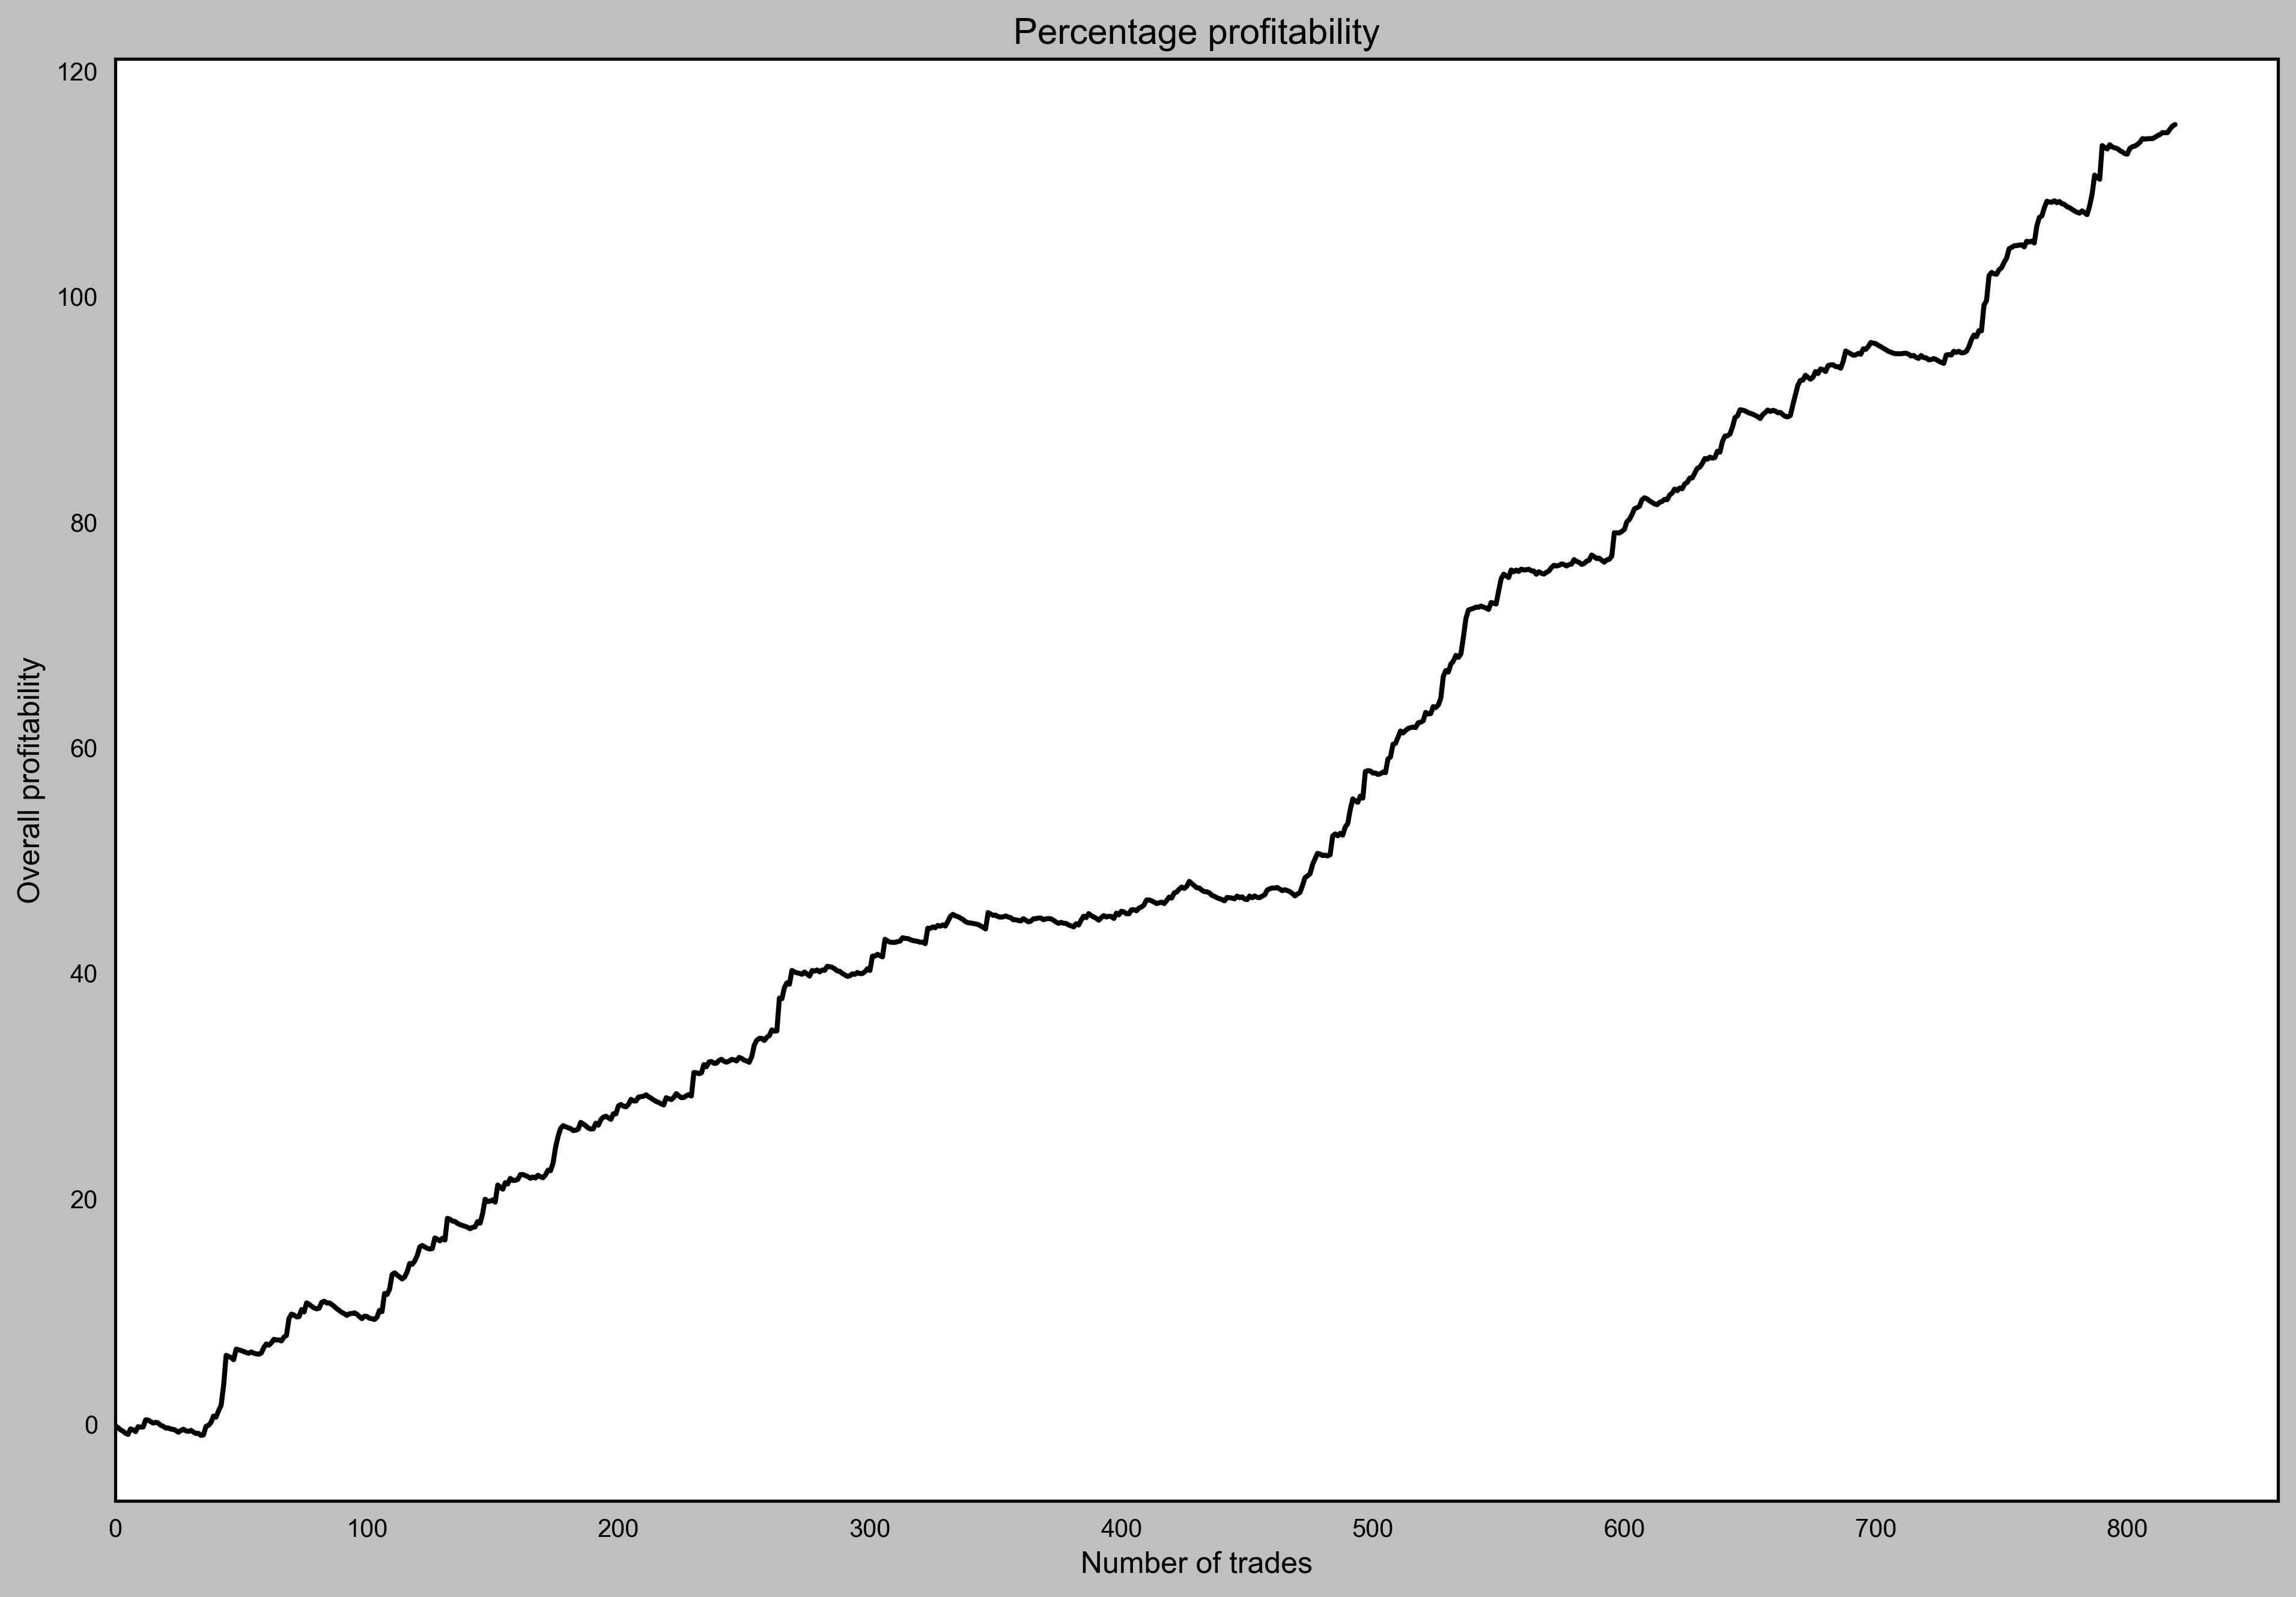

In [63]:
#Using matplotlib
plt.style.use("grayscale")
fig = plt.figure(figsize=(12,8), dpi = 300)
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(df["Cumulative profit percentage"])
axes.set_xlabel('Number of trades')
axes.set_ylabel('Overall profitability')
axes.set_title('Percentage profitability')
axes.set_xlim(xmin=0)
plt.show()

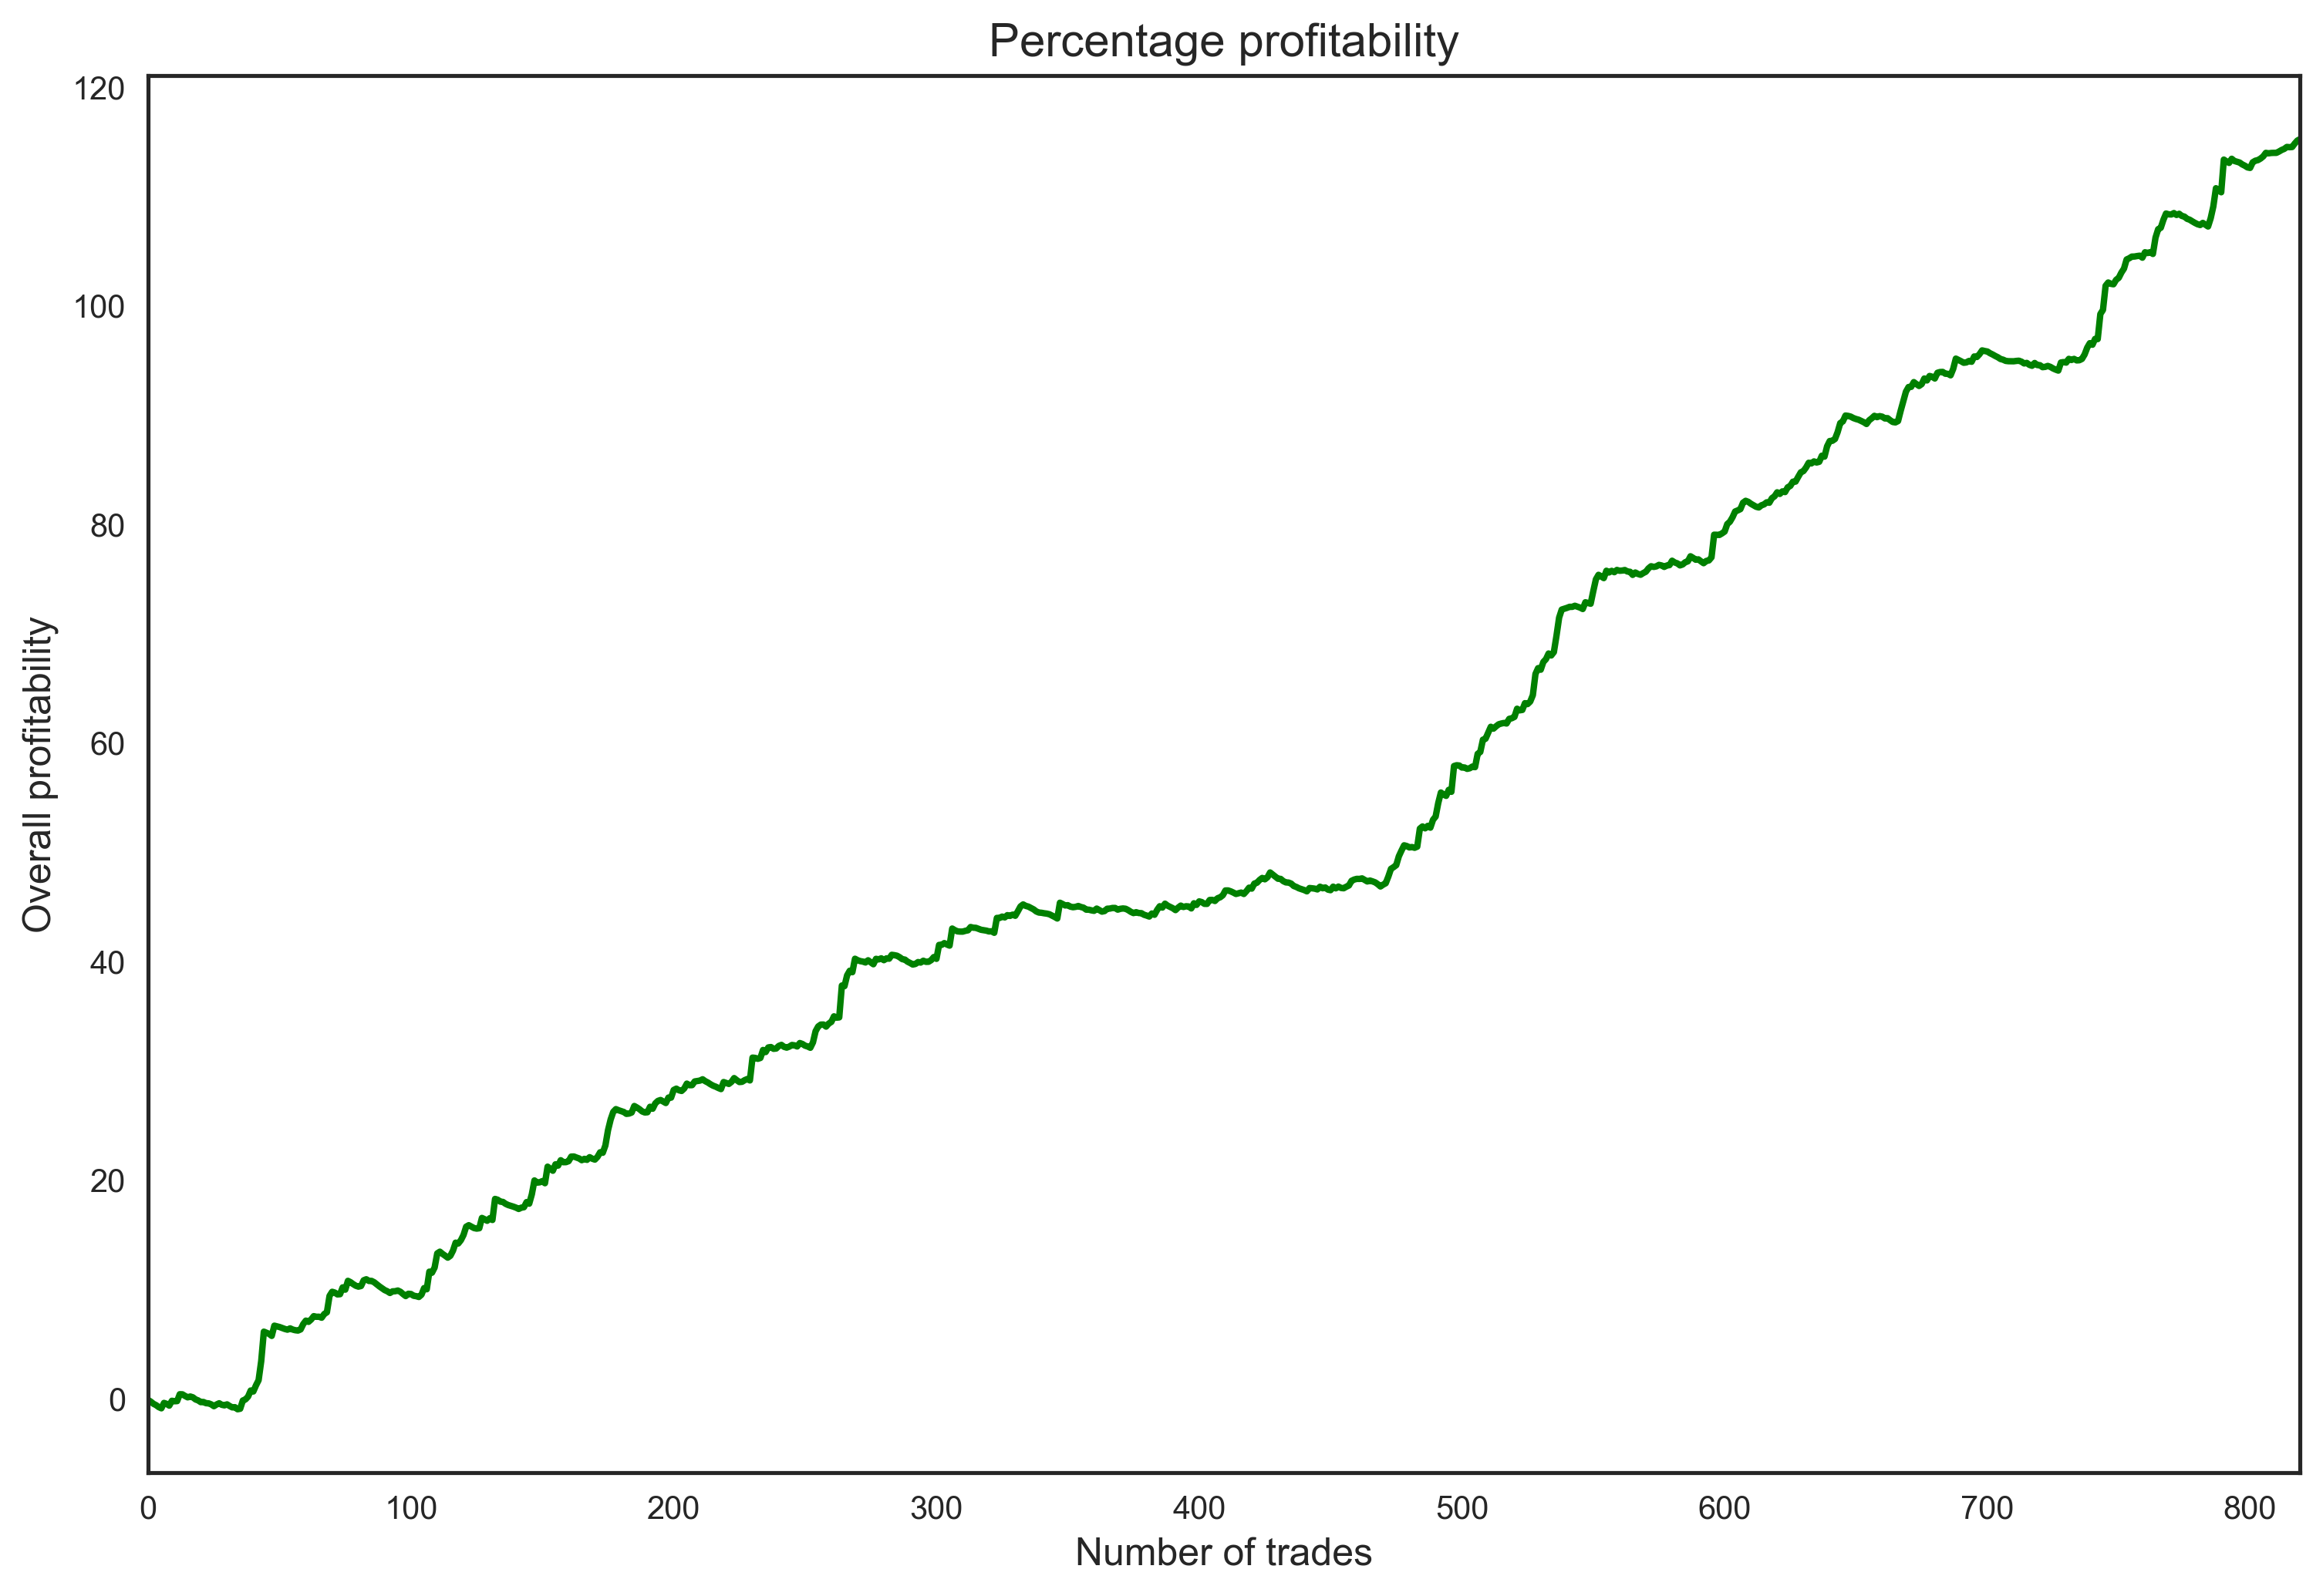

In [99]:
#Using seaborn
#Style must be one of white, dark, whitegrid, darkgrid, ticks
fig = plt.figure(figsize=(12,8), dpi = 300)
sns.set_style("white")
ax = sns.tsplot(data=df['Cumulative profit percentage'],color='green')
ax.set_xlabel('Number of trades')
ax.set_ylabel('Overall profitability')
ax.set_title('Percentage profitability')
plt.show()

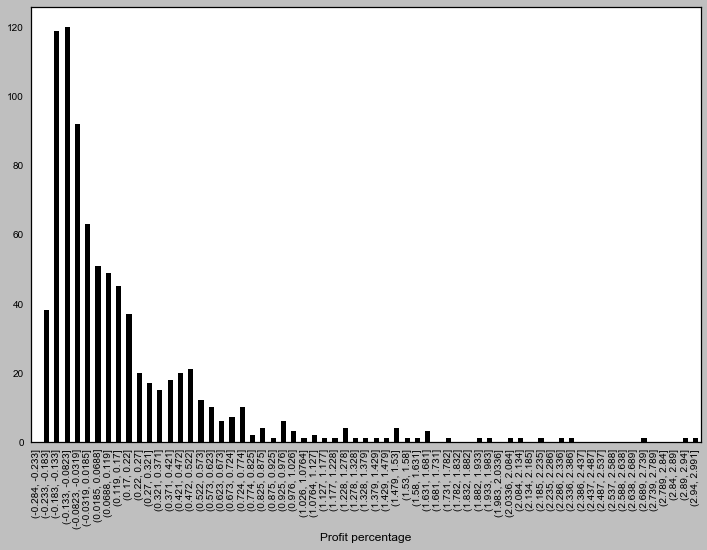

In [100]:
#Using pandas visualization
plt.style.use("grayscale")
dist_of_returns.plot.bar(figsize=(12,8))
plt.show()

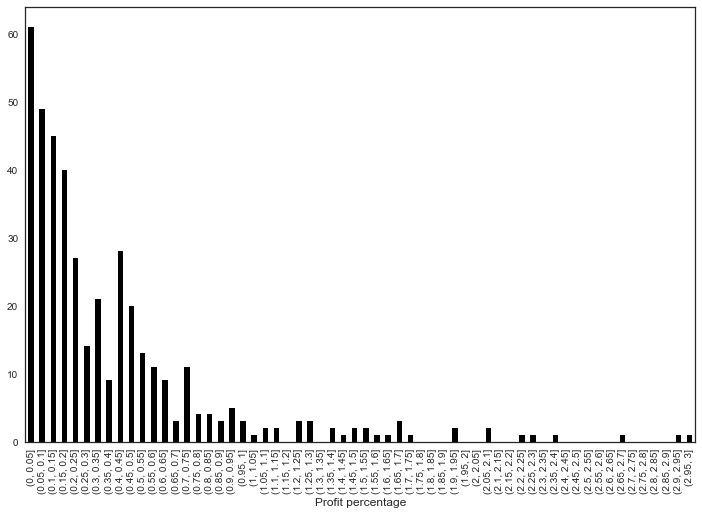

In [101]:
plt.style.use("seaborn-white")
pos_dist.plot.bar(figsize=(12,8))
plt.show()

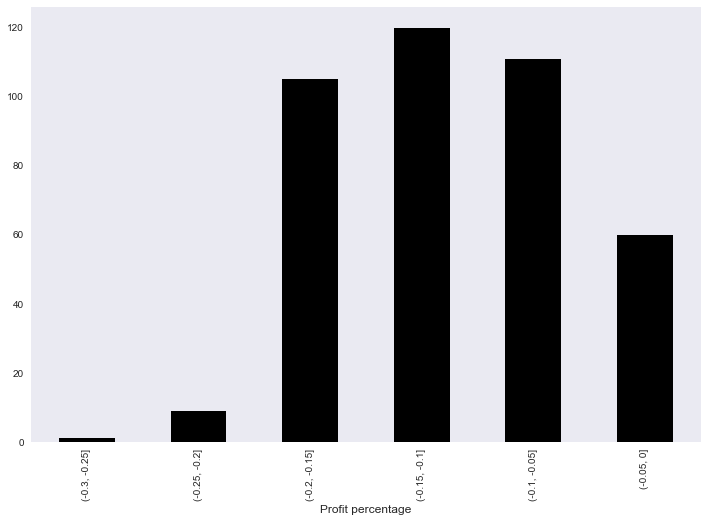

In [67]:
plt.style.use("seaborn-dark")
neg_dist.plot.bar(figsize=(12,8))
plt.show()

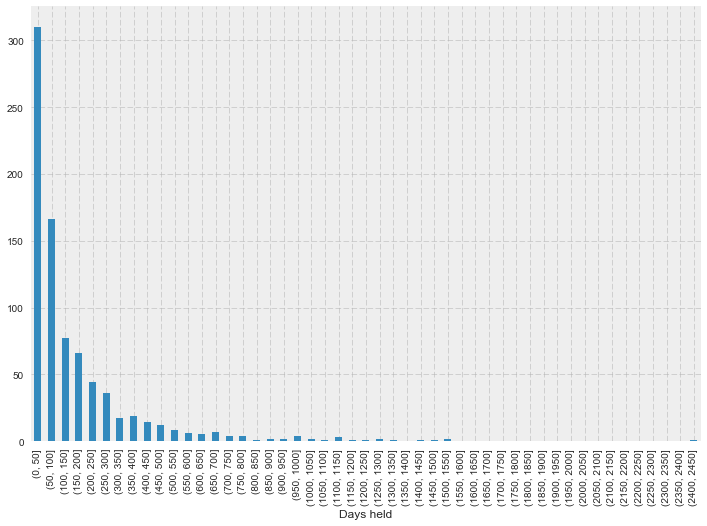

In [68]:
plt.style.use("bmh")
days_dist.plot.bar(figsize=(12,8))
plt.show()

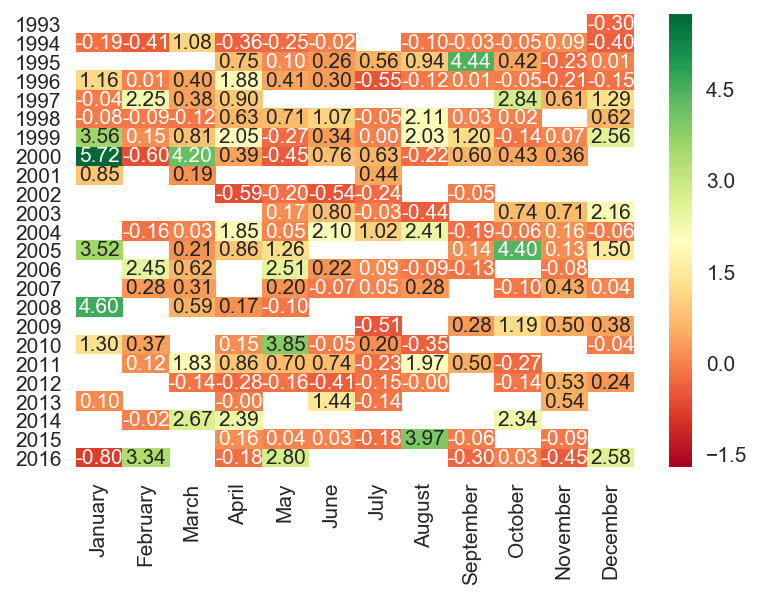

In [76]:
#White cells mean the strategy did not make any trades
fig = plt.figure(dpi = 150)
plt.style.use("seaborn-whitegrid")
sns.heatmap(heat_map, center = 2, annot=True, fmt="0.2f", cmap = 'RdYlGn')
plt.show()

### The End